<img src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500,>
<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h2 style="text-align: center;"><b>Домашнее задание: соревнование на Kaggle по распознаванию одежды</b></h2>

---

Всем привет!  

Надеемся, что вам показались интересными и понятными лекция и семинар по многослйным нейросетям и PyTorch. Если же Вы ещё не успели ими насладиться -- просьба посмотреть видео на нашем канале и просмотреть ноутбуки с семинара, в этом ноутбуке эти знания будут использоваться на практике.

<h2 style="text-align: center;"><b>FashionMNIST</b></h2>

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

Выше изображены примеры того, с чем мы будем работать -- чёрно-белые изображения одежды. Слева более классический датасет -- MNIST, он же датасет рукописных цифр. Мы решили, что вам будет интереснее всё же рнаучить машину распознавать одежду (спойлер: с рукописными цифрами такой подход это тоже будут работать ;)

<h3 style="text-align: center;"><b>Ссылка на соревнование: https://www.kaggle.com/c/dlschool-fashionmnist3. Вам нужно скачать оттуда всё из раздела `Data`, далее мы будем работать с этим - обучаться на train и предсказывать на test.</b></h3> 

<h4 style="text-align: center;"><b>Оргиниальный датасет: https://www.kaggle.com/zalando-research/fashionmnist</b></h4> 

После скачивания (скачанный архив распакуйте в одну папку с этим ноутбуком) и регистрации на Kaggle Вам нужно вступить в соревнование (по ссылке выше) и прочитать его описание.

<h3 style="text-align: center;"><b>Пожалуйста, укажите в соревновании свой ник == вашему нику на Canvas, иначе мы не сможем потом поставить вам баллы</b></h3>

Платформа **Kaggle** -- основная платформа для соревнований в Data Science, так что привыкайте ;)

<h2 style="text-align: center;"><b>Данные</b></h2>

Мы будем работать с картинками одежды (чёрно-белыми, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды. Давайте посмотрим на то, что за датасет мы скачали:

In [1]:
import pandas as pd

In [2]:
TRAIN_PATH = './fashionmnist/fashion-mnist_train.csv'
TEST_PATH = './fashionmnist/fashion-mnist_test.csv'

In [3]:
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

In [4]:
test_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,44,105,44,10,0,...,105,64,30,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,174,136,155,31,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


Выведем начало таблиц:

In [5]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Выведем размеры обучающей и тестовой выборок:

In [7]:
train_df.shape

(60000, 785)

In [8]:
test_df.shape

(10000, 784)

Что значат эти размеры и числа внутри DataFrame'ов? Всё просто -- **каждая строчка соответствует одной картинке**, а **столбцы -- это значения в пикселях этой кратинки**. **Первый столбец в train_df говорит о типе (классе) одежды (от 0 до 9)**.  

Однако перед тем, как двигаться дальше, краткая информация о представлении изображений в компьютере:

<h2 style="text-align: center;"><b>Изображения</b></h2>

<p align=center><img src="https://openclipart.org/image/2400px/svg_to_png/136057/1304647802.png" width=300 height=300></p>

Как и вся информация, изображения представляются в компьютере числами. Стандартное цветовое пространство, с помощью которого декодируют и отрисовывают изображение -- это RGB (Red, Green и Blue). Каждая комбинация трёх чисел от 0 до 255 задаёт какой-то цвет. Например, (255,255,255) задаёт белый цвет, (255,0,0) -- красный. Также происходит и при загрузке картинок в Python, давайте посмотрим напрмиере:

* Загрузим произвольную цветную картинку с помощью matplotlib:

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
image_png = plt.imread('./fpmi_logo.png')

In [11]:
image_png

array([[[0.9098039 , 0.9254902 , 0.94509804, 0.5686275 ],
        [0.89411765, 0.92156863, 0.92156863, 0.14901961],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.89411765, 0.92156863, 0.92156863, 0.14901961],
        [0.9098039 , 0.9254902 , 0.94509804, 0.5686275 ]],

       [[0.89411765, 0.92156863, 0.92156863, 0.14901961],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.89411765, 0.92156863, 0.92156863, 0.14901961]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.      

* Посмотрим на тип загруженного объекта:

In [12]:
type(image_png)

numpy.ndarray

Интересно, картинка стала `numpy.array`. А какая его форма и что внутри?

In [13]:
image_png.shape

(716, 2232, 4)

In [14]:
image_png[0].shape

(2232, 4)

In [15]:
image_png[0]

array([[0.9098039 , 0.9254902 , 0.94509804, 0.5686275 ],
       [0.89411765, 0.92156863, 0.92156863, 0.14901961],
       [0.        , 0.        , 0.        , 0.        ],
       ...,
       [0.        , 0.        , 0.        , 0.        ],
       [0.89411765, 0.92156863, 0.92156863, 0.14901961],
       [0.9098039 , 0.9254902 , 0.94509804, 0.5686275 ]], dtype=float32)

In [16]:
image_png.dtype

dtype('float32')

То есть это какая матрица, а точнее тензор (потому что есть третья размерность), у которого 573 строки, 1579 столбцов и 4 канала. Можно представлять это себе как 4 наложенных друг на друга матрицы, каждая из которых отвечает за один цвет -- R, G и B.  Внутри всех этих матриц лежат числа типа float32, то есть вещественные. Тут стоит сказать, что это просто тонкости загрузки в matplotlib -- на самом деле это матрицы из целых числе от 0 до 255 (включительно).

Стоп, но ведь каналов 4, а не 3? Да, четвёртый канал в данном случае -- это альфа-канал, у .png картинок он обычно присутствует. Давайте попробуем загрузить .jpg картинку:

In [17]:
image_jpg = plt.imread('./dlschool_logo.jpg')

In [18]:
image_jpg.shape

(400, 400, 3)

Отлично, теперь 3 канала и нам совсем не страшно -- это три матрицы 400 на 400, каждая из которых отвечает за один цвет. Давайте отрисуем две загруженные картинки с помощью matplotlib:

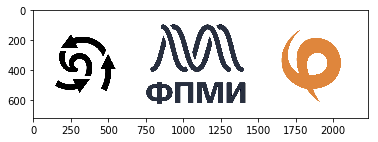

In [19]:
plt.imshow(image_png);

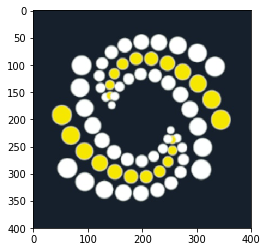

In [20]:
plt.imshow(image_jpg);

В данном случае **пиксель** -- это кортеж (упорядоченная последовательность чисел), состоящий из трёх чисел (как в примере раньше, например, (255,0,0) -- полностью красный пиксель). 

Итак, картинки -- это матрицы, состоящие из чисел, которые характеризуют насышенность данного пикселя определённым цветом цветом.  

Аналогично и с **чёрно-белыми изображениями** -- это просто матрица с одним каналом (то есть пксель -- это просто число), например, 28 на 28, каждое число которой от 0 до 255 характеризует яркость пикселя (насыщенность белым). 
Например, 255 -- это полностью белый пиксель, 0 -- полностью чёрный. Пора посмотреть, с чем мы будем работать в соревновании.

<h2 style="text-align: center;"><b>Данные (2)</b></h2>

Вернёмся к данным:

In [21]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [22]:
test_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,44,105,44,10,0,...,105,64,30,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,174,136,155,31,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


Самый первый столбец -- **label**. Подробнее:

каждая картинка иметт класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot| 

In [23]:
train_df.values[0]

array([  2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,
         0,   0,   0,   0,  62,  61,  21,  29,  23,  51, 136,  61,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  88, 201, 228, 225, 255, 115,  62, 137, 255, 235,
       222, 255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  47, 252, 234, 238, 224, 215, 215, 229, 108, 180,
       207, 214, 224, 231, 249, 254,  45,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0, 214, 222, 210, 213, 224, 225, 21

Видно, что это картинка типа Pullover (класс 2).

**Примечание:** у тестового датасета нужно удалить столбец label (по понятным причинам) -- вам нужно будет его предсказать и отправить эти предсказания в Kaggle.

Итак, мы имеем 60000 картинок, у каждой известна метка класса (то есть что это за одежда).  
Отделим `X` (признаковое описание объектов) и `y` (метки классов):

In [24]:
X_train = train_df.values[:, 1:]
y_train = train_df.values[:, 0]

X_test = test_df.values  # [:, 1:]  # удаляем столбец 'label'

In [25]:
print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


In [26]:
print(X_test.shape)

(10000, 784)


Но почему пиксели так странно представлены? На самом деле 784 пикселя -- это 28 * 28, то есть это "развёрнутая в строку" чёрно-белая картинка 28 на 28 пикселей.

Давайте убедимся в этом, отрисовав несколько (можете менять индекс и смотрть на отрисовку):

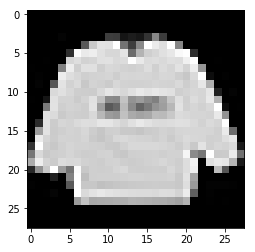

In [30]:
plt.imshow(X_train[0].reshape(28, 28), cmap='gray');

Не слишком похоже на пулловер, правда? :)  
    
Просто если мы будем использовать изображения большего разрешения, нам понадобятся бОльшие вычислительные мощности, поэтому пока что будем довольствоваться такими размерами.

Отлично, мы убедились в том, что имеем 60k картинок с метками для обучения, картинки "развёрнуты" в строку. Зачем разворачивать в строку? Потому что каждый пиксель в данном случае -- это один признак, то есть всего 784 признака, и уже их мы будем взвешивать нашей нейросетью, то есть у одного нейрона на входном слое будет 784 веса (+ Bias,  то есть 785 весов), на каждый пиксель по весу, и дальше уже будут второй слой, третий слой и так далее..

Время тренировать нейросети!

<h2 style="text-align: center;"><b>Нейросеть на PyTorch</b></h2>

Надеемся, что вы уже прорешали семинар, там довольно подробно всё описано. На всякий случай ещё раз напомним, из чего состоит процесс обучения нейросети:

- непосредственно, сама **архитектура** нейросети (сюда входят, например, типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количество **итераций обучения** (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

In [39]:
import matplotlib.pyplot as plt
import numpy as np

import torch

Проверим версию PyTorch:

In [40]:
torch.__version__

'1.0.1'

Сначала обернём данные в тензоры пайторча (может занять некоторое время):

In [41]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train.astype(np.int64))

Проверим:

In [42]:
print(X_train_tensor.shape, y_train_tensor.shape)

torch.Size([60000, 784]) torch.Size([60000])


In [43]:
y_train_tensor.unique()

tensor([2, 9, 6, 8, 0, 3, 4, 5, 7, 1])

На лекции обсуждалось, что нельзя просто запихнуть в LogLoss (основная функция потерь для задачи классификации, [как мы помним](https://drive.google.com/open?id=15wdyreZufKDxNQ55v4cl4Em2rtj7Q45B)) метки классов, предлагаем вам самим ещё раз подумать, почему. На всякий случай -- [ноутбук с более подробной информацией о функциях потерь](https://drive.google.com/open?id=1j6WpzeJQV1kS1Os4VJ0Avf68OkXVBo6W).

Так вот, нам надо преобразовать метки классов из целых чисел в OneHot-кодированные метки (если вам не знакомо это слово, [посмотрите первую половину этого видео](https://www.youtube.com/watch?v=ufkDhrngcr0)):

In [44]:
length = y_train_tensor.shape[0]
num_classes = 10  # количество классов, в нашем случае 10 типов одежды

# закодированные OneHot-ом метки классов
y_onehot = torch.FloatTensor(length, num_classes)

y_onehot.zero_()
y_onehot.scatter_(1, y_train_tensor.view(-1, 1), 1)

print(y_train_tensor)
print(y_onehot)

tensor([2, 9, 6,  ..., 8, 8, 7])
tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.]])


Видим, что наши метки перешли в вид "единица там, где номер класса, а остальные нули".

Напишем код, очень похожий на код с семинара: возьмём два слоя -- входной и один скрытый (выходной обычно не считают, но он тоже есть):

In [45]:
# N - размер батча (batch_size, нужно для метода оптимизации)
# D_in - размерность входа (количество признаков у объекта)
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
D_in, H, D_out = 784, 100, 10

# определим нейросеть:
net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.Softmax()
)

Обратите внимание:  

`D_in` -- это входная размерность (784 признака -- пикселя)  
`D_out` -- выходная размерность (10 классов -- типов одежды), то есть 10 нейронов на выходном слое  
`H` -- количество нейронов в скрытом слое  

Осталось выбрать Loss (функцию потерь) и метод оптимизации, с помощью которого мы будем считать градиенты и обновлять с помощью них обновлять веса.  

Loss мы выберем CrossEntropy, то есть кросс-энтропию, этот лосс почти всегда используется в задаче многоклассовой классификации (см. лекцию и ноутбук [loss_functions.ipynb](https://drive.google.com/open?id=1j6WpzeJQV1kS1Os4VJ0Avf68OkXVBo6W), там всё подробно объясняется), а метод оптимизации выберем обычный SGD (Stochastic Gradient Descent, стохастический градиентный спуск, см. лекцию про нейрон).

---

Однако перед тем, как перейти к коду обучения нейросети, есть одна тонкость -- **батчи**, а точнее **мини-батчи**.

**Мини-батчи** -- это небольшие (обычно размера 16, 32 или 64) "куски" выборки, то есть мини-батч размера 64 -- это 64 объекта из датасета. Обычно мини-батч называют просто батч (batch).

Так вот: методы оптимиазции по типу стохастического градиентного спуска часто считаются не под одному объекту (в этом случае оптимизация будет очень нестабильная, "шумная"), а по нескольким -- по батчу. То есть в обычном градиентном спуске будет сумма по всей выборке, в стохастическом (чистом варианте) -- по одному объекту, а "между ними" -- мини-батч SGD, то есть подсчёт градиентов на небольшом кусочке данных.

Одна **итерация (iteration)** алгоритма оптимизации -- это проход по одному батчу.
Одна **эпоха (epoch)** алгоритма оптимизации -- это проход по всей выборке. 

То есть, например, если выборка размера 60000, а батч размера 64, то одна эпоха занимает 60000 / 64 = 937,5 = 938 итераций.

---

Напишем функцию, генерирующую батчи:

In [46]:
def generate_batches(X, y, batch_size=64):
    for i in range(0, X.shape[0], batch_size):
        X_batch, y_batch = X[i:i+batch_size], y[i:i+batch_size]
        yield X_batch, y_batch

Код обучения нейросети (обязателньо убедитесь, что понимаете, что делает каждая строчка -- это необходимо для ваших дальнейших экспериментов):

In [47]:
BATCH_SIZE = 64
NUM_EPOCHS = 100

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

for epoch_num  in range(NUM_EPOCHS):
    iter_num = 0
    running_loss = 0.0
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        # forward (подсчёт ответа с текущими весами)
        y_pred = net(X_batch)

        # вычисляем loss'ы
        loss = loss_fn(y_pred, y_batch)
        
        running_loss += loss.item()
        
        # выводем качество каждые 2000 батчей
            
        if iter_num % 100 == 99:
            print('[{}, {}] current loss: {}'.format(epoch_num, iter_num + 1, running_loss / 100))
            running_loss = 0.0
            
        # зануляем градиенты
        optimizer.zero_grad()

        # backward (подсчёт новых градиентов)
        loss.backward()

        # обновляем веса
        optimizer.step()
        
        iter_num += 1

C:\Users\yushanov\Anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\yushanov\Anaconda3\lib\site-packages\torch\nn\modules\container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[0, 100] current loss: 145.95813888549804
[0, 200] current loss: 145.28492080688477
[0, 300] current loss: 144.90386505126952
[0, 400] current loss: 145.18942306518554
[0, 500] current loss: 144.8923483276367
[0, 600] current loss: 143.76334106445313
[0, 700] current loss: 144.57827560424803
[0, 800] current loss: 144.40264389038086
[0, 900] current loss: 144.9560382080078
[1, 100] current loss: 144.9384716796875
[1, 200] current loss: 145.13540588378908
[1, 300] current loss: 144.7557096862793
[1, 400] current loss: 145.15213577270507
[1, 500] current loss: 144.88170761108398
[1, 600] current loss: 143.70399612426758
[1, 700] current loss: 144.54095306396485
[1, 800] current loss: 144.36487930297852
[1, 900] current loss: 144.9374057006836
[2, 100] current loss: 144.87124740600586
[2, 200] current loss: 145.14159240722657
[2, 300] current loss: 144.7236540222168
[2, 400] current loss: 145.11824157714844
[2, 500] current loss: 144.80113723754883
[2, 600] current loss: 143.6922886657714

[21, 700] current loss: 123.52477638244629
[21, 800] current loss: 123.27790962219238
[21, 900] current loss: 125.30593322753906
[22, 100] current loss: 123.80228332519532
[22, 200] current loss: 124.55717224121094
[22, 300] current loss: 123.09993186950683
[22, 400] current loss: 125.44786483764648
[22, 500] current loss: 122.99280883789062
[22, 600] current loss: 123.79852355957031
[22, 700] current loss: 123.02740020751953
[22, 800] current loss: 122.72517333984375
[22, 900] current loss: 123.6247029876709
[23, 100] current loss: 122.94148612976075
[23, 200] current loss: 124.56409065246582
[23, 300] current loss: 122.77622810363769
[23, 400] current loss: 124.67747215270997
[23, 500] current loss: 122.36638259887695
[23, 600] current loss: 123.46123046875
[23, 700] current loss: 123.26668045043945
[23, 800] current loss: 122.94568954467773
[23, 900] current loss: 123.7072396850586
[24, 100] current loss: 123.19214103698731
[24, 200] current loss: 124.12898567199707
[24, 300] curren

[43, 100] current loss: 122.71498420715332
[43, 200] current loss: 123.74109565734864
[43, 300] current loss: 122.13532821655274
[43, 400] current loss: 124.15580543518067
[43, 500] current loss: 122.74872581481934
[43, 600] current loss: 123.32119598388672
[43, 700] current loss: 123.03459121704101
[43, 800] current loss: 122.77721153259277
[43, 900] current loss: 123.09914527893066
[44, 100] current loss: 123.2824299621582
[44, 200] current loss: 124.36630287170411
[44, 300] current loss: 122.877378616333
[44, 400] current loss: 124.16002159118652
[44, 500] current loss: 122.62249633789062
[44, 600] current loss: 123.11865447998046
[44, 700] current loss: 123.3178010559082
[44, 800] current loss: 122.30917091369629
[44, 900] current loss: 123.07983680725097
[45, 100] current loss: 122.83265663146973
[45, 200] current loss: 123.88372489929199
[45, 300] current loss: 122.19035690307618
[45, 400] current loss: 124.64666313171386
[45, 500] current loss: 122.8209928894043
[45, 600] curren

[64, 500] current loss: 122.6258748626709
[64, 600] current loss: 122.8813932800293
[64, 700] current loss: 122.60594436645508
[64, 800] current loss: 122.99874366760254
[64, 900] current loss: 122.88702476501464
[65, 100] current loss: 122.42048461914062
[65, 200] current loss: 123.6897364807129
[65, 300] current loss: 121.89766700744629
[65, 400] current loss: 124.02622268676758
[65, 500] current loss: 122.23716842651368
[65, 600] current loss: 122.5948533630371
[65, 700] current loss: 122.83266372680664
[65, 800] current loss: 122.34018035888671
[65, 900] current loss: 123.05341270446777
[66, 100] current loss: 122.53723625183106
[66, 200] current loss: 123.74865814208984
[66, 300] current loss: 122.20444389343261
[66, 400] current loss: 124.02613426208497
[66, 500] current loss: 123.06358421325683
[66, 600] current loss: 123.8173543548584
[66, 700] current loss: 122.91219337463379
[66, 800] current loss: 122.76995491027832
[66, 900] current loss: 123.01937683105469
[67, 100] curren

[85, 900] current loss: 123.06839965820312
[86, 100] current loss: 123.1981005859375
[86, 200] current loss: 123.96028030395507
[86, 300] current loss: 121.56812255859376
[86, 400] current loss: 123.36758575439453
[86, 500] current loss: 122.01528007507324
[86, 600] current loss: 122.45675254821778
[86, 700] current loss: 122.20806686401367
[86, 800] current loss: 122.62909759521484
[86, 900] current loss: 122.93368598937988
[87, 100] current loss: 122.87135269165039
[87, 200] current loss: 123.44543724060058
[87, 300] current loss: 122.1497834777832
[87, 400] current loss: 123.48491073608399
[87, 500] current loss: 122.22150016784668
[87, 600] current loss: 122.63811576843261
[87, 700] current loss: 122.62418907165528
[87, 800] current loss: 122.29751678466796
[87, 900] current loss: 122.67800094604492
[88, 100] current loss: 122.70085929870605
[88, 200] current loss: 123.5653865814209
[88, 300] current loss: 121.78754135131835
[88, 400] current loss: 123.75854621887207
[88, 500] curr

Отлично, мы получили обученную нейросеть. Давайте измерим качество на обучающей выбоорке:

In [48]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

with torch.no_grad():
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        y_pred = net(X_batch)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == y_batch).squeeze()
        for i in range(len(y_pred)):
            label = y_batch[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

C:\Users\yushanov\Anaconda3\lib\site-packages\torch\nn\modules\container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of T-shirt/top : 91 %
Accuracy of Trouser :  0 %
Accuracy of Pullover : 83 %
Accuracy of Dress : 93 %
Accuracy of  Coat : 80 %
Accuracy of Sandal : 99 %
Accuracy of Shirt :  0 %
Accuracy of Sneaker :  0 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot :  0 %


Уже сейчас видно, что сеть далеко не идеально -- она предсказывает только 7 классов, а про некоторые просто "забывает".

Теперь предскажем на тестовой и сохраним предсказания в файл. Это ни что иное, как baseline, который вам надо побить, чтобы получить хоть какие-то ненулевые баллы за это ДЗ.

In [49]:
y_test_pred = net(torch.FloatTensor(X_test))

C:\Users\yushanov\Anaconda3\lib\site-packages\torch\nn\modules\container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [50]:
y_test_pred.shape

torch.Size([10000, 10])

In [51]:
y_test_pred[:5]

tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.4731e-30, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 5.1837e-34,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [8.4142e-03, 0.0000e+00, 9.9159e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],
       grad_fn=<SliceBackward>)

Преобразуем OneHot'ы в числовые метки:

In [52]:
_, predicted = torch.max(y_test_pred, 1)

predicted

tensor([0, 3, 2,  ..., 8, 8, 2])

Сохраним в датафрейм:

In [53]:
answer_df = pd.DataFrame(data=predicted.numpy(), columns=['Category'])
answer_df.head()

,Category
0,0
1,3
2,2
3,2
4,3


In [54]:
answer_df['Id'] = answer_df.index

In [55]:
answer_df.head()

,Category,Id
0,0,0
1,3,1
2,2,2
3,2,3
4,3,4


In [56]:
answer_df.tail()

,Category,Id
9995,0,9995
9996,2,9996
9997,8,9997
9998,8,9998
9999,2,9999


Отлично, созраним в файл и отправим:

In [57]:
answer_df.to_csv('./baseline.csv', index=False)

В точности этот файл и есть **baseline.csv**, который вы видите на лидерборде и который вам нужно побить.

<h2 style="text-align: center;"><b>Задание</b></h2>

Добейтесь как можно лучшего качества в соревновании!  

Используйте знания, полученные на занятиях и те, которые вы найдёте в интернете. Если у вас получится, можете использовать и свёрточные нейросети, а не только полносвязные. Вам нужно как минимум побить baseline.

*Рекомендация*: попробуйте поменять количество итераций, количество нейронов, количество слоёв, гиперпараметры сети (learning_rate, метод оптимизации вместо SGD можно взять другой)

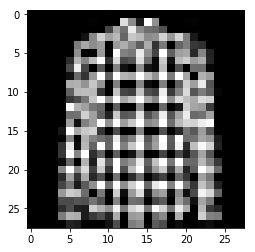

In [157]:
shirts = train_df[train_df['label'] == 6]
plt.imshow(shirts.values[14][1:].reshape(28, 28), cmap='gray');

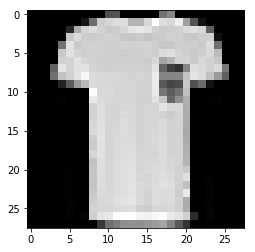

In [76]:
tops = train_df[train_df['label'] == 0]
plt.imshow(tops.values[10][1:].reshape(28, 28), cmap='gray');

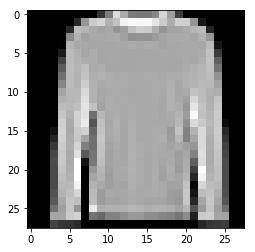

In [77]:
pullovers = train_df[train_df['label'] == 2]
plt.imshow(pullovers.values[10][1:].reshape(28, 28), cmap='gray');

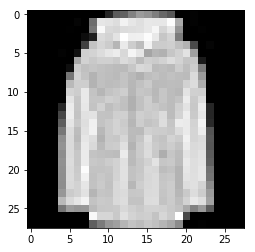

In [78]:
coats = train_df[train_df['label'] == 4]
plt.imshow(coats.values[10][1:].reshape(28, 28), cmap='gray');

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import torch

In [182]:
TRAIN_PATH = './fashionmnist/fashion-mnist_train.csv'
TEST_PATH = './fashionmnist/fashion-mnist_test.csv'

In [183]:
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

In [184]:
X_train = train_df.values[:, 1:]
y_train = train_df.values[:, 0]

X_test = test_df.values  # [:, 1:]  # удаляем столбец 'label'

In [185]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train.astype(np.int64))

In [186]:
D_in, H, D_out = 784, 200, 10

# определим нейросеть:
net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(H, H),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(H, D_out),
    #torch.nn.Softmax()
    torch.nn.LeakyReLU()
)

In [187]:
def generate_batches(X, y, batch_size=64):
    for i in range(0, X.shape[0], batch_size):
        X_batch, y_batch = X[i:i+batch_size], y[i:i+batch_size]
        yield X_batch, y_batch

In [188]:
BATCH_SIZE = 512
NUM_EPOCHS = 200

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

for epoch_num  in range(NUM_EPOCHS):
    iter_num = 0
    running_loss = 0.0
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        y_pred = net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        running_loss += loss.item()
            
        if iter_num % 100 == 99:
            print('[{}, {}] current loss: {}'.format(epoch_num, iter_num + 1, running_loss / 100))
            running_loss = 0.0
            
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        iter_num += 1

C:\Users\yushanov\Anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


[0, 100] current loss: 966.3911840820313
[1, 100] current loss: 431.43272277832034
[2, 100] current loss: 302.55321762084964
[3, 100] current loss: 258.40358505249026
[4, 100] current loss: 232.42793701171874
[5, 100] current loss: 213.31076293945313
[6, 100] current loss: 198.09868896484375
[7, 100] current loss: 186.08955474853516
[8, 100] current loss: 176.76723434448243
[9, 100] current loss: 167.7084930419922
[10, 100] current loss: 160.24693756103517
[11, 100] current loss: 153.35474990844727
[12, 100] current loss: 147.0361808013916
[13, 100] current loss: 141.45695037841796
[14, 100] current loss: 136.25776611328126
[15, 100] current loss: 131.50644638061524
[16, 100] current loss: 127.339965133667
[17, 100] current loss: 123.4130630493164
[18, 100] current loss: 119.60303810119629
[19, 100] current loss: 116.08812789916992
[20, 100] current loss: 112.1055704498291
[21, 100] current loss: 109.13145530700683
[22, 100] current loss: 105.63038879394531
[23, 100] current loss: 103.

[191, 100] current loss: 13.6792910861969
[192, 100] current loss: 12.333471760749816
[193, 100] current loss: 11.922906360626222
[194, 100] current loss: 11.427311153411866
[195, 100] current loss: 12.23334834575653
[196, 100] current loss: 10.91659462928772
[197, 100] current loss: 11.321510276794434
[198, 100] current loss: 11.274939370155334
[199, 100] current loss: 10.347174565792084


In [189]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

with torch.no_grad():
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        y_pred = net(X_batch)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == y_batch).squeeze()
        for i in range(len(y_pred)):
            label = y_batch[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-shirt/top : 90 %
Accuracy of Trouser : 99 %
Accuracy of Pullover : 94 %
Accuracy of Dress : 98 %
Accuracy of  Coat : 89 %
Accuracy of Sandal : 99 %
Accuracy of Shirt : 98 %
Accuracy of Sneaker : 99 %
Accuracy of   Bag : 99 %
Accuracy of Ankle boot : 99 %


In [190]:
y_test_pred = net(torch.FloatTensor(X_test))

In [191]:
net.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=784, out_features=200, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=200, out_features=200, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=200, out_features=10, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
)>

In [192]:
_, predicted = torch.max(y_test_pred, 1)
answer_df = pd.DataFrame(data=predicted.numpy(), columns=['Category'])
answer_df['Id'] = answer_df.index
answer_df.to_csv('./newline.csv', index=False)

In [193]:
print('H = {}\nBATCH_SIZE = {}\nNUM_EPOCHS = {}\nlearning_rate = {}\nloss_fn={}\n'.format(H, BATCH_SIZE, NUM_EPOCHS, learning_rate, loss_fn))

H = 200
BATCH_SIZE = 512
NUM_EPOCHS = 200
learning_rate = 0.0001
loss_fn=CrossEntropyLoss()



<h3 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). *Примеры написания нейросетей на PyTorch (офийиальные туториалы) (на английском): https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#examples  
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html*

2). ***Один из самых подробных и полных курсов по deep learning на данный момент - это курс Стэнфордского Университета (он вообще сейчас один из лидеров в области ИИ, его выпускники работают в Google, Facebook, Amazon, Microsoft, в стартапах в Кремниевой долине):  http://cs231n.github.io/***  

3). Практически исчерпывающая информация по основам нейросетей (из cs231n) (на английском):  

http://cs231n.github.io/neural-networks-1/,  
http://cs231n.github.io/neural-networks-2/,  
http://cs231n.github.io/neural-networks-3/,  
http://cs231n.github.io/neural-networks-case-study/#linear

4). *Хорошие статьи по основам нейросетей (на английском):  http://neuralnetworksanddeeplearning.com/chap1.html*

5). *Наглядная демонстрация того, как обучаются нейросети:  https://cs.stanford.edu/people/karpathy/convnetjs/*

6). *Подробнее про backprop -- статья на Medium: https://medium.com/autonomous-agents/backpropagation-how-neural-networks-learn-complex-behaviors-9572ac161670*

7). *Статья из интернет по Backprop: http://page.mi.fu-berlin.de/rojas/neural/chapter/K7.pdf*